<a href="https://colab.research.google.com/github/adriUNA/LaboratoriosCursoAnalisisDeDatos/blob/main/LABS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Laboratorio 1
#Introducción al Análisis de Datos

#Derek Espinach
#Adrian Morales
#Montserrat Castillo
#Ángel Quesada

from statistics import mode
import math
import numpy as np
print("Promedio de los elementos del vector")
suma= 0
media= 0
Visitas=[]
N= int (input("Ingrese la cantidad de personas preguntadas: "))
for i in range(N):
  cantidad=int(input("Cantidad de visitas: "))
  Visitas.append(cantidad)
  suma=suma+Visitas[i]
  moda = mode(Visitas)
media=suma/N
print(media)

def ord_burbuja(Visitas):
    n = len(Visitas)

    for i in range(n-1):
        for j in range(n-1-i):
            if Visitas[j] > Visitas[j+1]:
                Visitas[j], Visitas[j+1] = Visitas[j+1], Visitas[j]

print("Ordenamiento ascendente...")
mitad=N/2
mitadF=int(mitad)
mediana=Visitas[mitadF]
print("Mediana: ",mediana)

print("Moda: ",moda)

def desviacion():
  sumatoria=0
  for i in range(N):
    sumatoria =(Visitas[i]+sumatoria-media)**2

  fraccion=sumatoria/N
  raiz_cuadrada=math.sqrt(fraccion)
  print("La desviacion estandar es: ",raiz_cuadrada)
  Varianza=raiz_cuadrada**2
  print("Varianza: ",Varianza)

print(desviacion())



In [ ]:
#Laboratorio 2
#Introducción al Análisis de Datos

#Derek Espinach
#Adrian Morales
#Montserrat Castillo
#Ángel Quesada

import pandas as pd
df=pd.read_csv('/content/casasboston.csv')
data=pd.DataFrame(df)
print(data)

import pandas as pd
df=pd.read_csv('/content/casasboston.csv')
data=pd.DataFrame(df)
print(data.AGE)
print()
print()
dataResultado=data.loc[(data['AGE']==65.2)]
print(dataResultado)

#1 Seleccionar TOWN
#2 TOWN: "CRIM" aquellos casos que son superiores a 0.50
#3 Sacar el promedio de la edad. Usar la funcion promedio de matemática.
#4 Imprimir un indice y una edad, retorna los puntos correspondientes
#5 Ordenamiento por CRIM //sort para el ordenamiento

dataLugar=data.loc[(data['TOWN']=="Salem")]
print(dataLugar)
#1 Seleccionar TOWN

dataSalem=data.loc[(data['TOWN']=="Salem")]
dataCRIM=dataSalem.loc[(data['CRIM']>=0.5)]
print(dataCRIM)
#2 TOWN: "CRIM" aquellos casos que son superiores a 0.50

import statistics
dataSalem=data.loc[(data['TOWN']=="Salem")]
dataEdad=dataSalem.AGE
promedio = statistics.mean(dataEdad)
print(promedio)
#3 Sacar el promedio de la edad. Usar la funcion promedio de matemática.

dataSalem=data.loc[(data['TOWN']=="Salem")]
print(dataSalem.CRIM)
print(dataSalem.AGE)
#4 Imprimir un indice y una edad, retorna los puntos correspondientes

dataCRIM=pd.DataFrame(df)
dataCRIM=data.loc[(data['TOWN']=="Salem")]
sorted_df = dataCRIM.sort_values(by=['CRIM'], ascending=True)
print(sorted_df)
#5 Ordenamiento por CRIM //sort para el ordenamiento

In [ ]:
#Laboratorio 3
#Introducción al Análisis de Datos

#Derek Espinach
#Adrian Morales
#Montserrat Castillo
#Ángel Quesada

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/CSVInvestigation.csv')
data=pd.DataFrame(df)
print(data)

data=data.astype({"Value":float})
data2018=data.loc[(data['Year']==2018)]
print(data)

dataFiltered=data.loc[(data['Series']=="Intentional homicide rates per 100,000")]
print((dataFiltered.sort_values(by=['Value'],ascending=False))[['Country','Value']].head(5))

dataFiltered=data.loc[(data['Series']=="Intentional homicide rates per 100,000")]
print((dataFiltered.sort_values(by=['Value'],ascending=True))[['Country','Value']].head(5))

print(data2018['Series'].value_counts())

dataFilteredCR=data.loc[(data['Country']=="Costa Rica")&(data['Year']==2005)]
print(dataFilteredCR)
print(dataFilteredCR.sort_values(by=['Value'],ascending=False)[['Country','Series','Value']])

registro=df.loc[(df["Country"]=="Costa Rica")|(df["Country"]=="Panama")|(df["Country"]=="Nicaragua")]
print(registro)

annio=df["Year"]
registroAnnio=annio.mode()
print(registroAnnio)

print('Genero mas afectado en promedio en el año 2018')
dataFilteredByGender=data2018.loc[((
    data2018['Series'] =="Percentage of male and female intentional homicide victims, Male")
    |(data2018['Series'] =="Percentage of male and female intentional homicide victims, Female"))
    ].groupby('Series')['Value']
print(dataFilteredByGender.mean())


In [ ]:
#Laboratorio 4
#Introducción al Análisis de Datos

#Derek Espinach
#Adrian Morales
#Montserrat Castillo
#Ángel Quesada

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

countries = [
    "Argentina", "Bolivia", "Brazil", "Canada", "Chile", "Colombia", "Costa Rica",
    "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala", "Honduras",
    "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "United States", "Uruguay",
    "Venezuela"
]

latitudes = [
    -34.6118, -16.5000, -14.2350, 56.1304, -33.4489, 4.6097, 9.9347, 23.1136, 18.7357, -1.8312,
    13.7942, 14.6349, 15.7835, 23.6345, 19.4326, 12.8654, 8.9833, -23.4425, -9.1900, 37.7749, -32.5228, 10.4910
]

X = np.array(latitudes).reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(X, np.zeros_like(X), c=labels, cmap='viridis')
plt.scatter(centroids, np.zeros_like(centroids), marker='X', s=200, c='red', label='Centroids')
plt.yticks([])
plt.xlabel('Latitud')
plt.title('Clustering de Países de América por Latitud')
plt.legend()
plt.show()

In [ ]:
#Laboratorio 5
#Introducción al Análisis de Datos

#Derek Espinach
#Adrian Morales
#Montserrat Castillo
#Ángel Quesada

import folium
from folium.plugins import minimap
USA=folium.Map(location=(28.385233, -81.563874))

from branca.element import Figure
from folium.plugins import MiniMap

popuptext='<b>DisneyWorld</b>'
my_map = folium.Map(location=[28.385233, -81.563874],zoom_start=15,tiles='stamenterrain')
folium.Marker(location=[28.385233, -81.563874],popup=popuptext,icon=folium.Icon(color="red",icon="ok-sign")).add_to(my_map)
folium.Circle(location=[28.385233, -81.563874],color="blue",weight=4,fill_color="grey",fill_opacity=0.3,tooltip="El miki maus").add_to(my_map)

minimap=MiniMap(tile_layer='stamenterrain',position='bottomright')
my_map.add_child(minimap)
my_map.save('C:mapa.html')
my_map

from branca.element import Figure
from folium.plugins import MiniMap

# Punto 1
popuptext1 = '<b>Edificio de Estudios Generales</b>'
folium.Marker(location=[9.997947117533164, -84.11176690795543], popup=popuptext1, icon=folium.Icon(color="red", icon="ok-sign")).add_to(my_map)
folium.Circle(location=[9.997947117533164, -84.11176690795543], color="blue", weight=4, fill_color="grey", fill_opacity=0.3, tooltip="Edificio Generales").add_to(my_map)

# Punto 2
popuptext2 = '<b>Auditorio</b>'
folium.Marker(location=[9.999639345563576, -84.1096009815108], popup=popuptext2, icon=folium.Icon(color="red", icon="ok-sign")).add_to(my_map)
folium.Circle(location=[9.999639345563576, -84.1096009815108], color="purple", weight=4, fill_color="grey", fill_opacity=0.3, tooltip="Auditorio").add_to(my_map)

# Punto 3
popuptext3 = '<b>Edificio de la escuela de informática</b>'
folium.Marker(location=[9.970648619143118, -84.12919817201912], popup=popuptext3, icon=folium.Icon(color="red", icon="ok-sign")).add_to(my_map)
folium.Circle(location=[9.970648619143118, -84.12919817201912], color="red", weight=4, fill_color="grey", fill_opacity=0.3, tooltip="Escuela de informática").add_to(my_map)

# Punto 4
popuptext4 = '<b>Auditorio Centro de Convenciones</b>'
folium.Marker(location=[10.001469407012092, -84.10132675890293], popup=popuptext4, icon=folium.Icon(color="red", icon="ok-sign")).add_to(my_map)
folium.Circle(location=[10.001469407012092, -84.10132675890293], color="red", weight=4, fill_color="grey", fill_opacity=0.3, tooltip="Centro de Convenciones").add_to(my_map)

# Punto 5
popuptext4 = '<b>Auditorio Centro de Convenciones</b>'
folium.Marker(location=[10.019386128278922, -84.19730229168735], popup=popuptext4, icon=folium.Icon(color="red", icon="ok-sign")).add_to(my_map)
folium.Circle(location=[10.019386128278922, -84.19730229168735], color="red", weight=4, fill_color="grey", fill_opacity=0.3, tooltip="Centro de Convenciones").add_to(my_map)


minimap=MiniMap(tile_layer='stamenterrain',position='bottomright')
my_map.add_child(minimap)
my_map.save('mapaUNA.html')
my_map

#Laboratorio 6
#Introducción al Análisis de Datos

#Derek Espinach
#Adrian Morales
#Montserrat Castillo
#Ángel Quesada

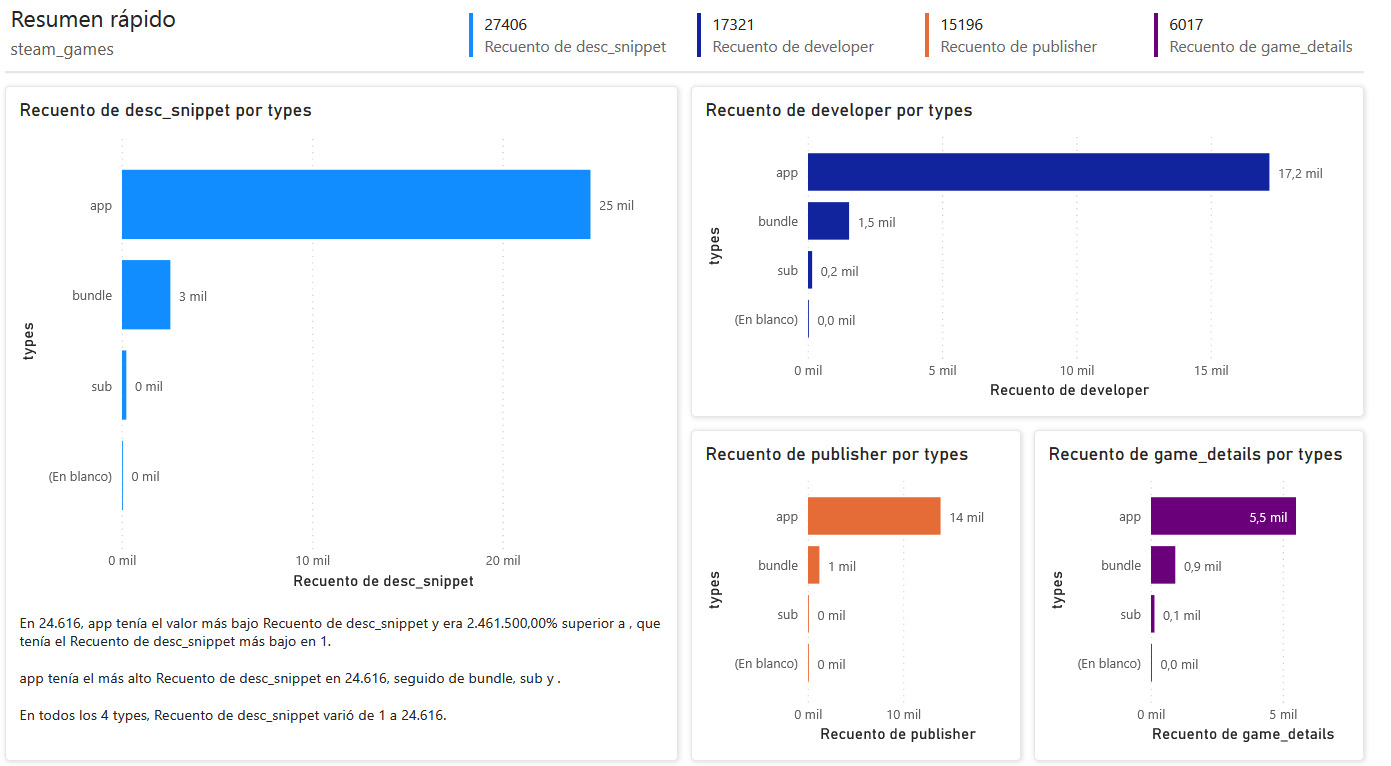

#Laboratorio 7
#Introducción al Análisis de Datos

#Derek Espinach
Lo que mas me intereso de power BI fue la sencillez de trabajar con el y la accesibilidad de descargarlo. Ademas sirve como ayuda con la temática del curso ya que analizar los datos de esta manera es mucho mas fácil de entender los datos que son relevantes. Creo que es una buena herramienta para usar como una opción alterna.

#Adrian Morales
La herramienta de PowerBI me pareció muy útil por sus herramientas de análisis y graficación automática además de todas las herramientas que aparecen disponibles en la aplicación y su compatibilidad con otras aplicaciones de Microsoft (Por ejemplo: PowerPoint aparece como una opción de exportación y visualización).
Por otra parte la facilidad de acceso por navegador (además de las funciones de la aplicación de escritorio) fue muy conveniente a la hora de accesarlo de diferentes dispositivos.

En comparación con Google Colab y Python es un sistema más amigable para nuevos usuarios pero no tiene tanta variedad de análisis como un análisis muy específico que se podría realizar en las herramientas antes mencionadas.
Si fuese a realizar un análisis más "superficial" de algún tema o documento muy probablemente use PowerBI a diferencia de Colab.

#Montserrat Castillo
En primera instancia la herramienta Power BI me parece útil en el ámbito del análisis de datos por su fácil comprensión de los gráficos y tablas de forma interactiva lo que nos permite exponer de una manera entendible para la mayoría y desglosar la información de una manera más satisfactoria para el análisis de datos, sin embargo la manera en la que nos permite manejarla importación de varias fuente como los archivos CSV, bases de datos, Power Ponit, etc...
Permitiendo una gran conectividad lo que esta limitado en otro tipo de plataformas y el compartir datos de esta plataforma es relativamente fácil por su compatibilidad con la nube.
si bien es cierto que es de un uso mas fácil que colaboratory de Google o el idioma de programación de Python, el tipo de análisis que estos nos pueden brindar es mas profundo y una mejor investigación

#Ángel Quesada
Lo que más me gustó de PowerBI es la facilidad de interacción entre el usuario-programa, donde sin necesidad de un gran conocimiento previo de la aplicación se pueden generar gráficos y análisis de datos de forma automática. Pueden utilizarse cualquier tipo de archivo con datos agregados desde un excel hasta un archivo csv permitiendo que se pueda manipular datos desde cualquier tipo de almacenamiento de los mismos.
Además. si ingresamos un poco más en el área de PowerBI podemos expresar los datos de manera más compleja, permitiendo crear mapas de calor y gráficos tabulares. Expresando con el nombre y porcentajes o lo que queramos el introducir o conocer en un análisis en específico.
El comprender PowerBI nos permite darnos una muestra de como utilizar e expresarnos en una base de datos o desarrollar un análisis de datos simple.